In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn

In [2]:
data=pd.read_csv('Income1.csv')

In [3]:
X=torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [4]:
Y=torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

# 分解写法

In [5]:
w=torch.randn(1,requires_grad=True)      #随机初始化一个w
b=torch.zeros(1,requires_grad=True)      #把b初始化为零

In [6]:
w,b

(tensor([-0.3830], requires_grad=True), tensor([0.], requires_grad=True))

模型公式w*x+b

In [7]:
learning_rate=0.0001    #定义学习速率，然后就可以写训练循环了

In [15]:
for i in range(500):
    for x,y in zip(X,Y):
        y_pred=torch.matmul(x,w)+b      #这里matmul是矩阵乘法（多个参数时这么乘）
                                        #就相当于w*x+b
        loss=(y-y_pred).pow(2).mean()   #求均方误差（实际值减预测值的平方的均值）
        if not w.grad is None:
            w.grad.data.zero_()         #梯度不为空就清零
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()       #dloss/dw和dloss/db,谁backward就是让它对跟踪的变量求微分
                              #这样w和b的grad就有值了
        with torch.no_grad():#这里是优化算法，不能改变梯度
            w.data-=w.grad.data*learning_rate
            b.data-=b.grad.data*learning_rate

In [9]:
w,b

(tensor([4.9740], requires_grad=True), tensor([-28.3590], requires_grad=True))

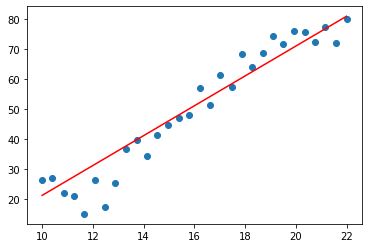

In [10]:
plt.plot(X.numpy(),(X*w+b).data.numpy(),c='r')#画图要用numpy的格式画，如果变量跟踪了
                                #而且有运算要取data值再转换成numpy这样就和梯度无关了
plt.scatter(data.Education,data.Income)

In [11]:
X=torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [12]:
Y=torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [13]:
learning_rate=0.0001
w=torch.randn(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [16]:
for i in range(500):
    for x,y in zip(X,Y):
        y_pred=torch.matmul(x,w)+b
        loss=(y-y_pred).pow(2).mean()
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        with torch.no_grad():
            w.data-=w.grad.data*learning_rate
            b.data-=b.grad.data*learning_rate